In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
from scipy.stats import shapiro, mannwhitneyu, kstest
import matplotlib.pyplot as plt

Scraping data with Selenium

In [31]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from bs4 import BeautifulSoup

In [25]:
from selenium import webdriver

driver = webdriver.Chrome()


In [27]:
driver.get('https://www.basketball-reference.com/leagues/NBA_2022_coaches.html')

In [29]:
page_source = driver.page_source

In [32]:
soup = BeautifulSoup(page_source, 'html.parser')


In [37]:
coach_names = soup.find_all('th', class_='left')

In [38]:
coach_names

[<th aria-label="Coach" class="poptip sort_default_asc show_partial_when_sorting left" data-stat="coach" scope="col">Coach</th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/mcmilna01c.html">Nate McMillan</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/udokaim01c.html">Ime Udoka</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/nashst01c.html">Steve Nash</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/donovbi99c.html">Billy Donovan</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/borreja99c.html">James Borrego</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/bickejb01c.html">J.B. Bickerstaff</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/kiddja01c.html">Jason Kidd</a></th>,
 <th class="left" data-stat="coach" scope="row"><a href="/coaches/malonmi99c.html">Michael Malone</a></th>,
 <th class="left" data-

In [ ]:
def scrape_coaches_year(url, scraper):
    if (scraper == 'pandas'):
        coaches = pd.read_html(url)[0]
    elif (scraper == 'selenium'):
        coaches = selenium_scraper(url)
    return coaches

In [4]:
def scrape_all_seasons(first_year, last_year, scraper):
    all_seasons = pd.DataFrame()
    for year in range(first_year, last_year + 1):
        url = f'https://www.basketball-reference.com/leagues/NBA_{year}_coaches.html'
        year_data = scrape_coaches_year(url, scraper)
        year_data['Year'] = year
        if year == first_year:
            all_seasons = year_data
        else:
            all_seasons = pd.concat([all_seasons, year_data], axis=0, ignore_index=True)
    return all_seasons


In [5]:
since_2000 = scrape_all_seasons(2000, 2023, 'pandas')

In [6]:
since_2000.columns = [' '.join(col).strip() for col in since_2000.columns]

In [7]:
since_2000.columns

Index(['Unnamed: 0_level_0 Unnamed: 0_level_1 Coach',
       'Unnamed: 1_level_0 Unnamed: 1_level_1 Tm',
       'Unnamed: 2_level_0 Unnamed: 2_level_1 Unnamed: 2_level_2',
       'Seasons w/ Franch #', 'Seasons Overall #',
       'Unnamed: 5_level_0 Unnamed: 5_level_1 Unnamed: 5_level_2',
       'Regular Season Current Season G', 'Regular Season Current Season W',
       'Regular Season Current Season L', 'Regular Season w/ Franchise G',
       'Regular Season w/ Franchise W', 'Regular Season w/ Franchise L',
       'Regular Season Career G', 'Regular Season Career W',
       'Regular Season Career L', 'Regular Season Career W%',
       'Unnamed: 16_level_0 Unnamed: 16_level_1 Unnamed: 16_level_2',
       'Playoffs Current Season G', 'Playoffs Current Season W',
       'Playoffs Current Season L', 'Playoffs w/ Franchise G',
       'Playoffs w/ Franchise W', 'Playoffs w/ Franchise L',
       'Playoffs Career G', 'Playoffs Career W', 'Playoffs Career L', 'Year'],
      dtype='object')

In [8]:
store_og_columns = since_2000.columns.copy()

In [9]:
since_2000.columns = [x.replace('Unnamed: ', '').replace('_level_', '').replace('1', '').replace('0', '').replace('5', '').replace('6', '').replace('2', '').replace('  ', '') for x in since_2000.columns]

In [10]:
since_2000.drop(columns=[''], inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
since_2000

,Coach,Tm,Seasons w/ Franch #,Seasons Overall #,Regular Season Current Season G,Regular Season Current Season W,Regular Season Current Season L,Regular Season w/ Franchise G,Regular Season w/ Franchise W,Regular Season w/ Franchise L,Regular Season Career G,Regular Season Career W,Regular Season Career L,Regular Season Career W%,Playoffs Current Season G,Playoffs Current Season W,Playoffs Current Season L,Playoffs w/ Franchise G,Playoffs w/ Franchise W,Playoffs w/ Franchise L,Playoffs Career G,Playoffs Career W,Playoffs Career L,Year
0,Lenny Wilkens,ATL,7,27,82,28,54,542,310,232,2160,1179,981,0.546,NaN,NaN,NaN,47.0,17.0,30.0,157.0,72.0,85.0,2000
1,Rick Pitino,BOS,3,5,82,35,47,214,90,124,378,180,198,0.476,NaN,NaN,NaN,NaN,NaN,NaN,13.0,6.0,7.0,2000
2,Paul Silas,CHH,2,5,82,49,33,117,71,46,363,149,214,0.410,4.0,1.0,3.0,4.0,1.0,3.0,4.0,1.0,3.0,2000
3,Tim Floyd,CHI,2,2,82,17,65,132,30,102,132,30,102,0.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
4,Randy Wittman,CLE,1,1,82,32,50,82,32,50,82,32,50,0.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Mike Brown,SAC,1,9,82,48,34,82,48,34,645,395,250,0.612,7.0,3.0,4.0,7.0,3.0,4.0,90.0,50.0,40.0,2023
806,Gregg Popovich,SAS,27,27,82,22,60,2127,1366,761,2127,1366,761,0.642,NaN,NaN,NaN,284.0,170.0,114.0,284.0,170.0,114.0,2023
807,Nick Nurse,TOR,5,5,82,41,41,390,227,163,390,227,163,0.582,NaN,NaN,NaN,41.0,25.0,16.0,41.0,25.0,16.0,2023
808,Will Hardy,UTA,1,1,82,37,45,82,37,45,82,37,45,0.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [12]:
previous_year_team = since_2000.groupby(['Tm', 'Year']).sum()
previous_year_team

C:\Users\timse\AppData\Local\Temp\ipykernel_8012\2216172992.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  previous_year_team = since_2000.groupby(['Tm', 'Year']).sum()


Seasons w/ Franch #  Seasons Overall #  \
Tm  Year                                           
ATL 2000                    7                 27   
    2001                    1                  1   
    2002                    2                  2   
    2003                    4                  4   
    2004                    2                  2   
...                       ...                ...   
WAS 2019                    3                 10   
    2020                    4                 11   
    2021                    5                 12   
    2022                    1                  1   
    2023                    2                  2   

          Regular Season Current Season G  Regular Season Current Season W  \
Tm  Year                                                                     
ATL 2000                               82                               28   
    2001                               82                               25   
    2002                               82                               33   
    2003                               82                               35   
    2004                               82                               28   
...                                   ...                              ...   
WAS 2019                               82                               32   
    2020                               72                               25   
    2021                               72                               34   
    2022                               82                               35   
    2023                               82                               35   

          Regular Season Current Season L  Regular Season w/ Franchise G  \
Tm  Year                                                                   
ATL 2000                               54                            542   
    2001                               57                             82   
    2002                               49                            164   
    2003                               47                            246   
    2004                               54                            137   
...                                   ...                            ...   
WAS 2019                               50                            246   
    2020                               47                            318   
    2021                               38                            390   
    2022                               47                             82   
    2023                               47                            164   

          Regular Season w/ Franchise W  Regular Season w/ Franchise L  \
Tm  Year                                                                 
ATL 2000                            310                            232   
    2001                             25                             57   
    2002                             58                            106   
    2003                             93                            153   
    2004                             52                             85   
...                                 ...                            ...   
WAS 2019                            124                            122   
    2020                            149                            169   
    2021                            183                            207   
    2022                             35                             47   
    2023                             70                             94   

          Regular Season Career G  Regular Season Career W  \
Tm  Year                                                     
ATL 2000                     2160                     1179   
    2001                       82                       25   
    2002                      164                       58   
    2003                      246                       

In [13]:
previous_year_team['Win%'] = previous_year_team['Regular Season Current Season W'] / previous_year_team['Regular Season Current Season G']

In [14]:
previous_year_team.reset_index(inplace=True)

In [15]:
# Adding 1 to year for joining purposes
previous_year_team['Year'] = previous_year_team['Year'] + 1

In [72]:
previous_year_team.rename(columns={'Playoffs Current Season G': 'Prev Yr Playoff Games', 'Playoffs Current Season W': 'Prev Yr Playoff Wins', 
                                   'Win%': 'Prev Year Win %'}, inplace=True)
previous_year_team

,Tm,Year,Seasons w/ Franch #,Seasons Overall #,Regular Season Current Season G,Regular Season Current Season W,Regular Season Current Season L,Regular Season w/ Franchise G,Regular Season w/ Franchise W,Regular Season w/ Franchise L,Regular Season Career G,Regular Season Career W,Regular Season Career L,Regular Season Career W%,Prev Yr Playoff Games,Prev Yr Playoff Wins,Playoffs Current Season L,Playoffs w/ Franchise G,Playoffs w/ Franchise W,Playoffs w/ Franchise L,Playoffs Career G,Playoffs Career W,Playoffs Career L,Prev Year Win %
0,ATL,2001,7,27,82,28,54,542,310,232,2160,1179,981,0.546,0.0,0.0,0.0,47.0,17.0,30.0,157.0,72.0,85.0,0.341463
1,ATL,2002,1,1,82,25,57,82,25,57,82,25,57,0.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304878
2,ATL,2003,2,2,82,33,49,164,58,106,164,58,106,0.354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402439
3,ATL,2004,4,4,82,35,47,246,93,153,246,93,153,0.797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426829
4,ATL,2005,2,2,82,28,54,137,52,85,137,52,85,0.380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,WAS,2020,3,10,82,32,50,246,124,122,791,462,329,0.584,0.0,0.0,0.0,19.0,9.0,10.0,92.0,48.0,44.0,0.390244
711,WAS,2021,4,11,72,25,47,318,149,169,863,487,376,0.564,0.0,0.0,0.0,19.0,9.0,10.0,92.0,48.0,44.0,0.347222
712,WAS,2022,5,12,72,34,38,390,183,207,935,521,414,0.557,5.0,1.0,4.0,24.0,10.0,14.0,97.0,49.0,48.0,0.472222
713,WAS,2023,1,1,82,35,47,82,35,47,82,35,47,0.427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426829


In [73]:
prev_year = previous_year_team[['Tm', 'Year', 'Prev Year Win %', 'Prev Yr Playoff Wins', 'Prev Yr Playoff Games']]

In [74]:
since_2000_with_past = since_2000.merge(prev_year, left_on=['Tm', 'Year'], right_on=['Tm', 'Year'], how='inner')

In [75]:
since_2000_with_past['First Season'] = since_2000_with_past['Seasons Overall #'] == 1
since_2000_with_past['Playoff Win Improvement'] = since_2000_with_past['Playoffs Current Season W'] - since_2000_with_past['Prev Yr Playoff Wins']
since_2000_with_past['Improved?'] = since_2000_with_past['Playoff Win Improvement'] > 0

In [65]:
pd.set_option('display.max_rows', 25)

In [76]:
s2wp = since_2000_with_past.copy()

In [19]:
first_season_head_coaches = since_2000_with_past[(since_2000_with_past['Seasons w/ Franch #'] == 1) & (since_2000_with_past['Regular Season Current Season G'] == 82)]

In [ ]:
first_season_head_coaches.fillna(0, inplace=True)

In [22]:
first_season_head_coaches

,Coach,Tm,Seasons w/ Franch #,Seasons Overall #,Regular Season Current Season G,Regular Season Current Season W,Regular Season Current Season L,Regular Season w/ Franchise G,Regular Season w/ Franchise W,Regular Season w/ Franchise L,Regular Season Career G,Regular Season Career W,Regular Season Career L,Regular Season Career W%,Playoffs Current Season G,Playoffs Current Season W,Playoffs Current Season L,Playoffs w/ Franchise G,Playoffs w/ Franchise W,Playoffs w/ Franchise L,Playoffs Career G,Playoffs Career W,Playoffs Career L,Year,Win%,Prev Yr Playoff Wins,Prev Yr Playoff Games
0,Lon Kruger,ATL,1,1,82,25,57,82,25,57,82,25,57,0.305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001,0.341463,0.0,0.0
9,Dave Cowens,GSW,1,5,82,17,65,82,17,65,329,153,176,0.465,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,8.0,2001,0.231707,0.0,0.0
11,Isiah Thomas,IND,1,1,82,41,41,82,41,41,82,41,41,0.500,4.0,1.0,3.0,4.0,1.0,3.0,4.0,1.0,3.0,2001,0.682927,13.0,23.0
12,Alvin Gentry,LAC,1,5,82,31,51,82,31,51,263,119,144,0.452,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,2001,0.182927,0.0,0.0
17,Byron Scott,NJN,1,1,82,26,56,82,26,56,82,26,56,0.317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001,0.378049,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Wes Unseld,WAS,1,1,82,35,47,82,35,47,82,35,47,0.427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,0.472222,1.0,5.0
734,Joe Mazzulla,BOS,1,1,82,57,25,82,57,25,82,57,25,0.695,17.0,9.0,8.0,17.0,9.0,8.0,17.0,9.0,8.0,2023,0.621951,14.0,24.0
747,Darvin Ham,LAL,1,1,82,43,39,82,43,39,82,43,39,0.524,16.0,8.0,8.0,16.0,8.0,8.0,16.0,8.0,8.0,2023,0.402439,0.0,0.0
759,Mike Brown,SAC,1,9,82,48,34,82,48,34,645,395,250,0.612,7.0,3.0,4.0,7.0,3.0,4.0,90.0,50.0,40.0,2023,0.365854,0.0,0.0


In [23]:
fshc = first_season_head_coaches.copy()

In [24]:
playoff_hirings = fshc[fshc['Prev Yr Playoff Games'] > 0]

In [25]:
playoff_hirings

,Coach,Tm,Seasons w/ Franch #,Seasons Overall #,Regular Season Current Season G,Regular Season Current Season W,Regular Season Current Season L,Regular Season w/ Franchise G,Regular Season w/ Franchise W,Regular Season w/ Franchise L,Regular Season Career G,Regular Season Career W,Regular Season Career L,Regular Season Career W%,Playoffs Current Season G,Playoffs Current Season W,Playoffs Current Season L,Playoffs w/ Franchise G,Playoffs w/ Franchise W,Playoffs w/ Franchise L,Playoffs Career G,Playoffs Career W,Playoffs Career L,Year,Win%,Prev Yr Playoff Wins,Prev Yr Playoff Games
11,Isiah Thomas,IND,1,1,82,41,41,82,41,41,82,41,41,0.500,4.0,1.0,3.0,4.0,1.0,3.0,4.0,1.0,3.0,2001,0.682927,13.0,23.0
27,Lenny Wilkens,TOR,1,28,82,47,35,82,47,35,2242,1226,1016,0.547,12.0,6.0,6.0,12.0,6.0,6.0,169.0,78.0,91.0,2001,0.548780,0.0,3.0
58,Maurice Cheeks,POR,1,1,82,49,33,82,49,33,82,49,33,0.598,3.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,2002,0.609756,0.0,3.0
106,Larry Brown,DET,1,25,82,54,28,82,54,28,1982,1162,820,0.586,23.0,16.0,7.0,23.0,16.0,7.0,206.0,105.0,101.0,2004,0.609756,8.0,17.0
109,Rick Carlisle,IND,1,3,82,61,21,82,61,21,246,161,85,0.654,16.0,10.0,6.0,16.0,10.0,6.0,43.0,22.0,21.0,2004,0.585366,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Jason Kidd,DAL,1,6,82,52,30,82,52,30,455,235,220,0.516,18.0,9.0,9.0,18.0,9.0,9.0,42.0,18.0,24.0,2022,0.583333,3.0,7.0
724,Chauncey Billups,POR,1,1,82,27,55,82,27,55,82,27,55,0.329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,0.583333,2.0,6.0
730,Wes Unseld,WAS,1,1,82,35,47,82,35,47,82,35,47,0.427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,0.472222,1.0,5.0
734,Joe Mazzulla,BOS,1,1,82,57,25,82,57,25,82,57,25,0.695,17.0,9.0,8.0,17.0,9.0,8.0,17.0,9.0,8.0,2023,0.621951,14.0,24.0


In [26]:
win_now_hires = playoff_hirings[['Coach', 'Tm', 'Year', 'Seasons Overall #', 'Prev Yr Playoff Wins', 'Playoffs Current Season W']]

In [28]:
win_now_hires = win_now_hires[win_now_hires.Year < 2023]

In [40]:
win_now_hires.rename(columns={'Playoffs Current Season W': 'Playoff Wins'}, inplace=True)

In [44]:
win_now_hires = win_now_hires[['Coach', 'Tm', 'Year', 'First Season', 'Improved?', 'Seasons Overall #', 'Prev Yr Playoff Wins',
       'Playoff Wins', 'Playoff Win Improvement']]

In [45]:
pd.set_option('display.max_rows', None)

In [62]:
win_now_hires[15:29]

,Coach,Tm,Year,First Season,Improved?,Seasons Overall #,Prev Yr Playoff Wins,Playoff Wins,Playoff Win Improvement
277,Michael Curry,DET,2009,True,False,1,10.0,0.0,-10.0
314,John Kuester,DET,2010,True,False,1,0.0,0.0,0.0
333,Eddie Jordan,PHI,2010,False,False,9,2.0,0.0,-2.0
341,Larry Drew,ATL,2011,True,True,1,4.0,6.0,2.0
345,Tom Thibodeau,CHI,2011,True,True,1,1.0,9.0,8.0
346,Byron Scott,CLE,2011,False,False,11,6.0,0.0,-6.0
431,Jacque Vaughn,ORL,2013,True,False,1,1.0,0.0,-1.0
441,Mike Budenholzer,ATL,2014,True,True,1,2.0,3.0,1.0
442,Brad Stevens,BOS,2014,True,False,1,2.0,0.0,-2.0
443,Jason Kidd,BRK,2014,True,True,1,3.0,5.0,2.0


In [51]:
win_now_hires[win_now_hires['Playoff Wins'] >= 12]

,Coach,Tm,Year,First Season,Improved?,Seasons Overall #,Prev Yr Playoff Wins,Playoff Wins,Playoff Win Improvement
106,Larry Brown,DET,2004,False,True,25,8.0,16.0,8.0
480,Steve Kerr,GSW,2015,True,True,1,3.0,16.0,13.0
632,Nick Nurse,TOR,2019,True,True,1,4.0,16.0,12.0
701,Ime Udoka,BOS,2022,True,True,1,1.0,14.0,13.0


In [50]:
# Alternatively, create a box plot to visualize the distribution of coaching performance
fig = px.box(win_now_hires, y='Playoff Win Improvement', x='First Season', color='First Season',
             title='Coaching Performance Comparison',
             labels={'Overall #': 'Overall Performance', 'First Season': 'First-Time Coach'}, height=750,width=1000)
fig.show()

In [33]:
first_year = win_now_hires[win_now_hires['First Season'] == True]
others = win_now_hires[win_now_hires['First Season'] == False]

In [34]:
len(first_year), len(others)

(20, 22)

In [35]:
first_year['Improved?'].sum()

8

In [36]:
others['Improved?'].sum()

11

Performing a statistical significance test to see if first time coaches perform differently than experienced head coaches in their first year with a new team

In [78]:
s2wp['Win %'] = s2wp['Regular Season Current Season W'] / s2wp['Regular Season Current Season G']
s2wp.head()

,Coach,Tm,Seasons w/ Franch #,Seasons Overall #,Regular Season Current Season G,Regular Season Current Season W,Regular Season Current Season L,Regular Season w/ Franchise G,Regular Season w/ Franchise W,Regular Season w/ Franchise L,Regular Season Career G,Regular Season Career W,Regular Season Career L,Regular Season Career W%,Playoffs Current Season G,Playoffs Current Season W,Playoffs Current Season L,Playoffs w/ Franchise G,Playoffs w/ Franchise W,Playoffs w/ Franchise L,Playoffs Career G,Playoffs Career W,Playoffs Career L,Year,Prev Year Win %,Prev Yr Playoff Wins,Prev Yr Playoff Games,First Season,Playoff Win Improvement,Improved?,Win %
0,Lon Kruger,ATL,1,1,82,25,57,82,25,57,82,25,57,0.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,0.341463,0.0,0.0,True,NaN,False,0.304878
1,Rick Pitino,BOS,4,6,34,12,22,248,102,146,412,192,220,0.466,NaN,NaN,NaN,NaN,NaN,NaN,13.0,6.0,7.0,2001,0.426829,0.0,0.0,False,NaN,False,0.352941
2,Jim O'Brien,BOS,1,1,48,24,24,48,24,24,48,24,24,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,0.426829,0.0,0.0,True,NaN,False,0.500000
3,Paul Silas,CHH,3,6,82,46,36,199,117,82,445,195,250,0.438,10.0,6.0,4.0,14.0,7.0,7.0,14.0,7.0,7.0,2001,0.597561,1.0,4.0,False,5.0,True,0.560976
4,Tim Floyd,CHI,3,3,82,15,67,214,45,169,214,45,169,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,0.207317,0.0,0.0,False,NaN,False,0.182927


In [79]:
s2wp['Win % Improvement'] = s2wp['Win %'] - s2wp['Prev Year Win %']

In [83]:
rookies = s2wp.loc[s2wp['First Season'] == True]['Win % Improvement']
vets = s2wp.loc[s2wp['First Season'] == False]['Win % Improvement']

In [86]:
rookies.mean()

-0.04349185952655977

In [87]:
vets.mean()

-0.00709985068309027

Checking to see that each sample is normally distributed
- Null Hypothesis: each sample is normally distributed

In [92]:
# Checking normality assumption for first-time head coaches
_, p_value_first_time = shapiro(rookies)
print("First-time head coaches - Shapiro-Wilk test p-value:", p_value_first_time)

# Checking normality assumption for experienced head coaches
_, p_value_experienced = shapiro(vets)
print("Experienced head coaches - Shapiro-Wilk test p-value:", p_value_experienced)


First-time head coaches - Shapiro-Wilk test p-value: 0.39619868993759155
Experienced head coaches - Shapiro-Wilk test p-value: 9.231482245297684e-09


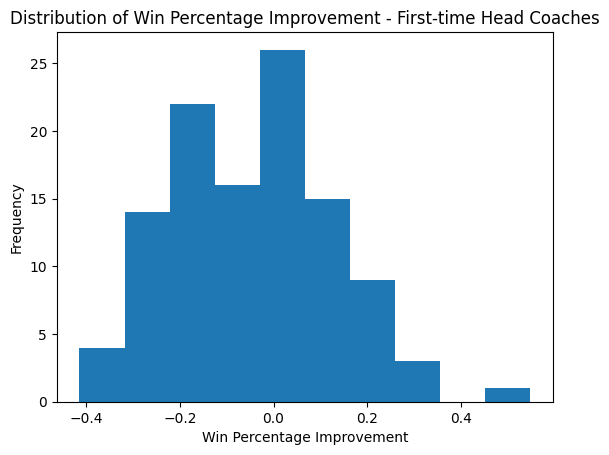

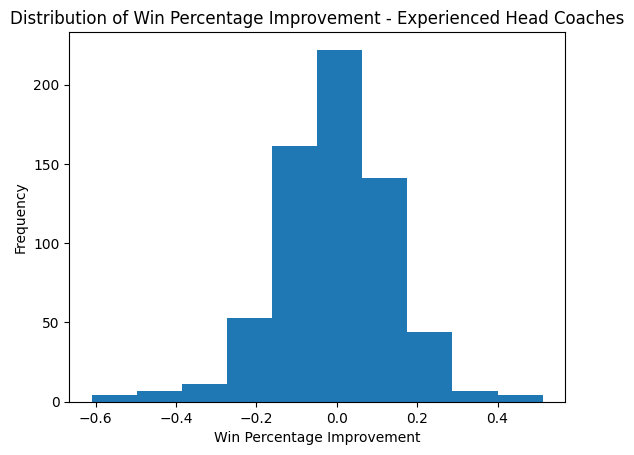

In [93]:
# Histogram for first-time head coaches
plt.hist(rookies, bins=10)
plt.xlabel("Win Percentage Improvement")
plt.ylabel("Frequency")
plt.title("Distribution of Win Percentage Improvement - First-time Head Coaches")
plt.show()

# Histogram for experienced head coaches
plt.hist(vets, bins=10)
plt.xlabel("Win Percentage Improvement")
plt.ylabel("Frequency")
plt.title("Distribution of Win Percentage Improvement - Experienced Head Coaches")
plt.show()


Experienced head coach data is not normally distributed, so I will use a mann whitney test which does not rely on normality assumption

In [94]:
# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(rookies, vets)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U statistic: 30563.5
P-value: 0.011586526607276172


In [97]:
_, p_value_first_time = kstest(rookies, vets)
print("kolmogorov-smirnov test p-value:", p_value_first_time)


kolmogorov-smirnov test p-value: 0.0007028841871072108


Conclusion: There is a significant difference between the success of first time head coaches and experienced head coaches
- Potential contributing factor: Teams may be more likely to hire a first time head coach when they are rebuilding